# End to End Machine Learning Project

## Install libs

## Get the Data

In [9]:
import tarfile
from pathlib import Path
from urllib.request import urlretrieve

import pandas as pd

TARBALL_BASE_RAW = './data/raw/'
TARBALL_BASE_RAW = './data/interim/'
TARBALL_RAW_FILE = 'housing.tgz'
TARBALL_RAW_FILE = 'housing.csv'

DATA_URL = 'https://github.com/ageron/data/raw/main/housing.tgz'

def load_housing_data():
    tarball_path = Path(TARBALL_PATH)
    
    if not tarball_path.is_file():
        Path('./data/raw/').mkdir(parents=True, exist_ok=True)
        urlretrieve(DATA_URL, './data/raw/housing.tgz')
        
        with tarfile.open('./data/raw/housing.tgz') as housing_tarball:
            housing_tarball.extractall(path='./data/interim')
    
    return pd.read_csv(Path('./data/interim/housing/housing.csv'))

df_houses = load_housing_data()

In [11]:
df_houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df_houses['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
df_houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

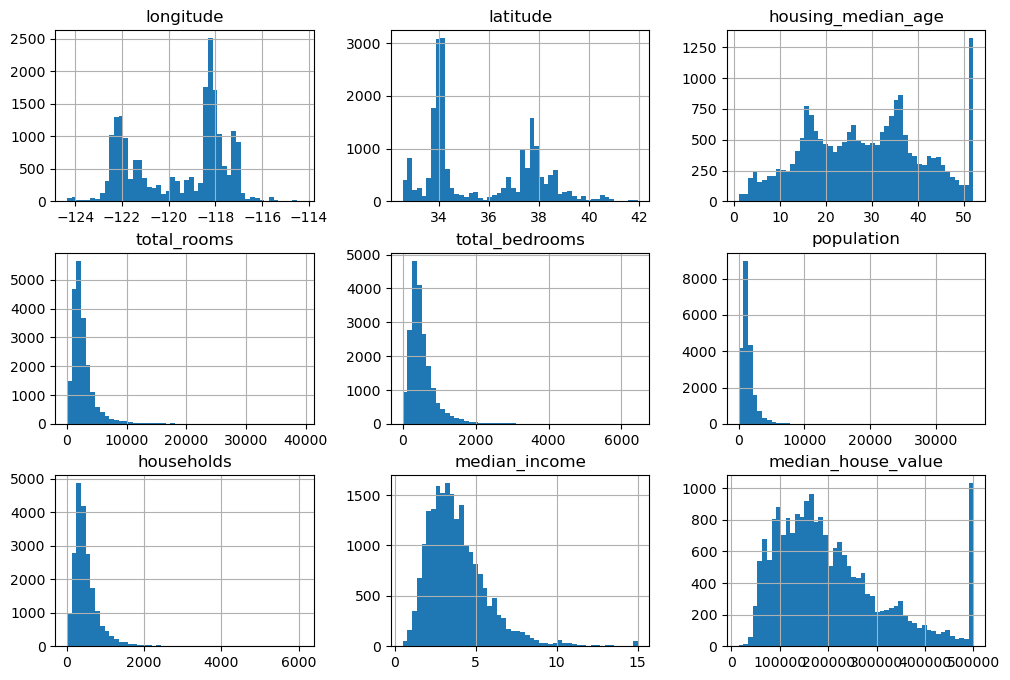

In [16]:
from matplotlib import pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', 
       labelsize=12,
       titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_houses.hist(bins=50,
               figsize=(12, 8))

In [17]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuflled_indices = np.random.permutation(len(data))
    
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuflled_indices[:test_set_size]
    
    train_indices = shuflled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = shuffle_and_split_data(df_houses, .2)
print('train_set', len(train_set))
print('test_set', len(test_set))

train_set 16512
test_set 4128


In [19]:
SEED = 42
np.random.seed(SEED)

In [22]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_hash(data, test_ratio, id_column):
    ids = data[id_column]
    
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
housing_with_id = df_houses.reset_index()

train_set, test_set = split_data_with_hash(housing_with_id,
                                           .2,
                                           'index')

print('train_set', len(train_set))
print('test_set', len(test_set))

train_set 16512
test_set 4128


In [25]:
housing_with_id['id'] = housing_with_id['longitude'] * 1000 + housing_with_id['latitude']
train_set, test_set = split_data_with_hash(housing_with_id,
                                           .2,
                                           'index')

print('train_set', len(train_set))
print('test_set', len(test_set))

train_set 16512
test_set 4128


In [33]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_houses,
                                       test_size=.2,
                                       random_state=SEED)

print('train_set', len(train_set))
print('test_set', len(test_set))

train_set 16512
test_set 4128


In [34]:
test_set['total_bedrooms'].isnull().sum()

44

> "To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value."

In [35]:
from scipy.stats import binom

sample_size = 1000

ratio_female = .511

proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)

proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)

print(proba_too_small + proba_too_large)

0.10736798530929942


In [36]:
samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 585)).mean()

0.04589

In [38]:
df_houses['income_cat'] = pd.cut(df_houses['median_income'], 
                                 bins=[0, 1.5, 3., 4.5, 6., np.inf], 
                                 labels=[1, 2, 3, 4, 5])

df_houses['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Text(0, 0.5, 'Number of districts')

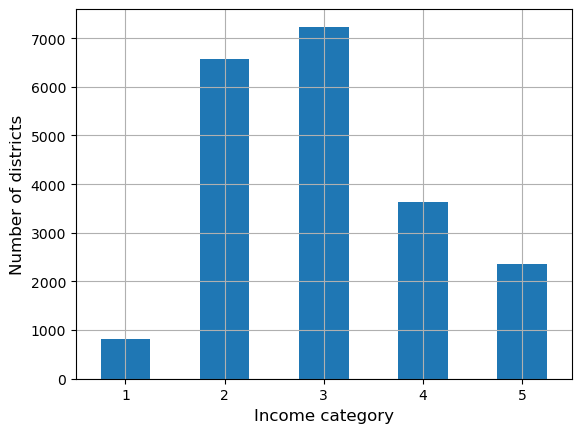

In [39]:
df_houses['income_cat'].value_counts()\
                       .sort_index()\
                       .plot.bar(rot=0, grid=True)

plt.xlabel('Income category')
plt.ylabel('Number of districts')


In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, 
                                  test_size=.2, 
                                  random_state=SEED)

strat_splits = []

for train_index, test_index in splitter.split(df_houses, df_houses['income_cat']):
    strat_train_set_n = df_houses.iloc[train_index]
    
    strat_test_set_n = df_houses.iloc[test_index]
    
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [44]:
strat_train_set, strat_test_set = strat_splits[0]

display(strat_train_set)
display(strat_test_set)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


In [46]:
strat_train_set, strat_test_set = train_test_split(df_houses,
                                                   test_size=.2,
                                                   stratify=df_houses['income_cat'],
                                                   random_state=SEED)

print('strat_train_set', len(strat_train_set))
print('strat_test_set', len(strat_test_set))

strat_train_set 16512
strat_test_set 4128


In [47]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(df_houses, 
                                       test_size=.2, 
                                       random_state=SEED)

compare_props = pd.DataFrame({
    'Overall %': income_cat_proportions(df_houses),
    'Stratified %': income_cat_proportions(strat_test_set),
    'Random %': income_cat_proportions(test_set)
}).sort_index()

compare_props.index.name = 'Income Category'

compare_props['Strat. Error %'] = (compare_props['Stratified %'] / compare_props['Overall %'] - 1)

compare_props['Rand. Error %'] = (compare_props['Random %'] / compare_props['Overall %'] - 1)

(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [48]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

## Discover and Visualize the Data to Gain Insights

In [50]:
housing = strat_train_set.copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

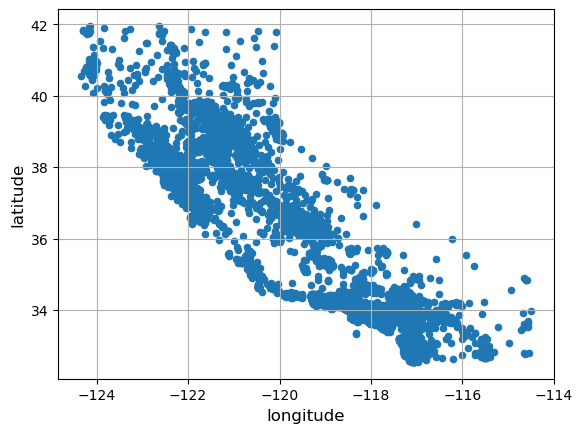

In [53]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             grid=True)

<Axes: xlabel='longitude', ylabel='latitude'>

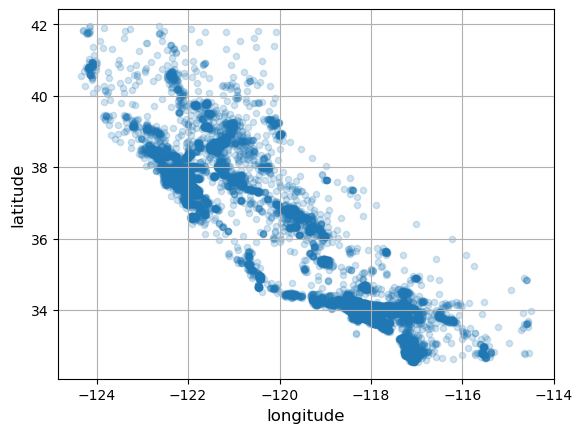

In [54]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             grid=True,
             alpha=.2)

<Axes: xlabel='longitude', ylabel='latitude'>

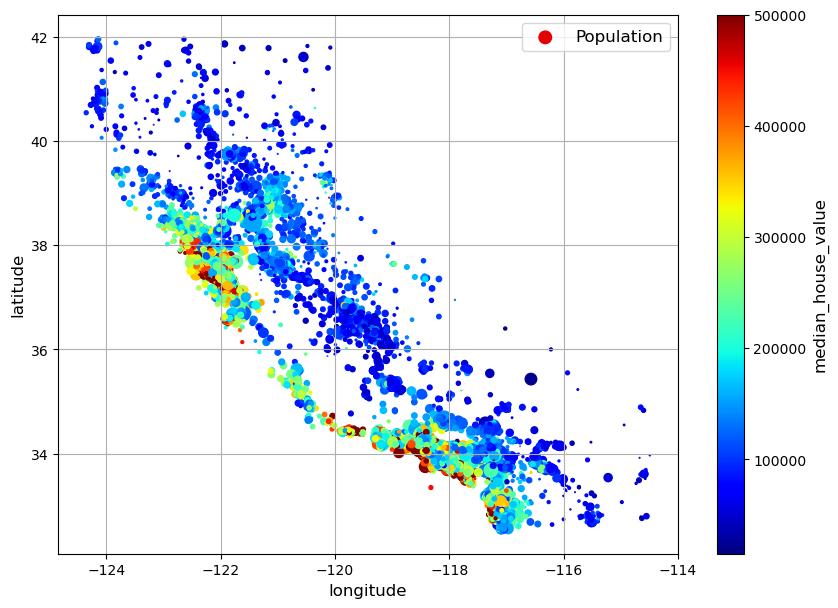

In [58]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             grid=True,
             s=housing['population'] / 100,
             c='median_house_value',
             label='Population',
             cmap='jet',
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(10, 7))

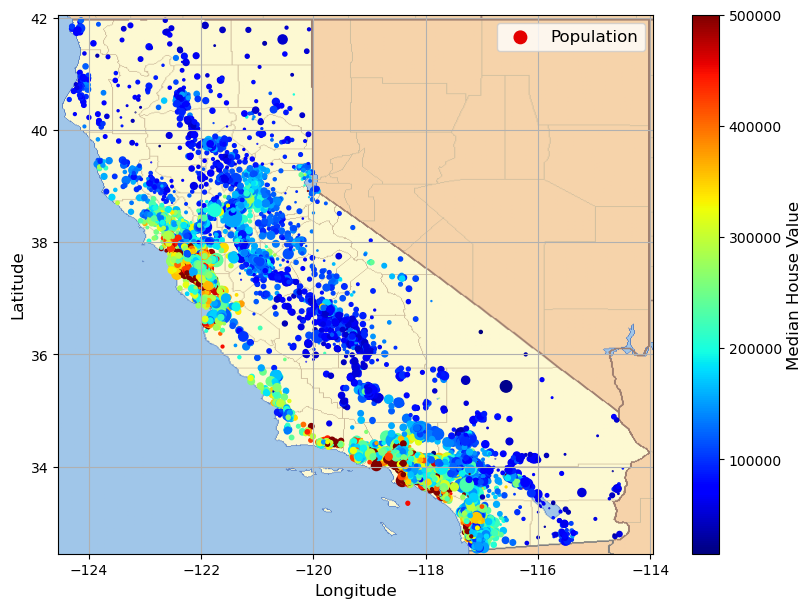

In [66]:
IMAGES_PATH = Path('./media/images')
FILENAME = 'california.png'

Path(IMAGES_PATH).mkdir(parents=True, exist_ok=True)

if not (IMAGES_PATH / FILENAME).is_file():
    print('Downloading image ', FILENAME)
    urlretrieve('https://github.com/ageron/handson-ml3/raw/main/images/end_to_end_project/' + FILENAME,
                IMAGES_PATH / FILENAME)
    
housing_renamed = housing.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'population': 'Population',
    'median_house_value': 'Median House Value'})

housing_renamed.plot(kind='scatter',
                     x='Longitude',
                     y='Latitude',
                     grid=True,
                     s=housing_renamed['Population'] / 100,
                     c='Median House Value',
                     label='Population',
                     cmap='jet',
                     colorbar=True,
                     legend=True,
                     sharex=False,
                     figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / FILENAME)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

In [67]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635


In [68]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

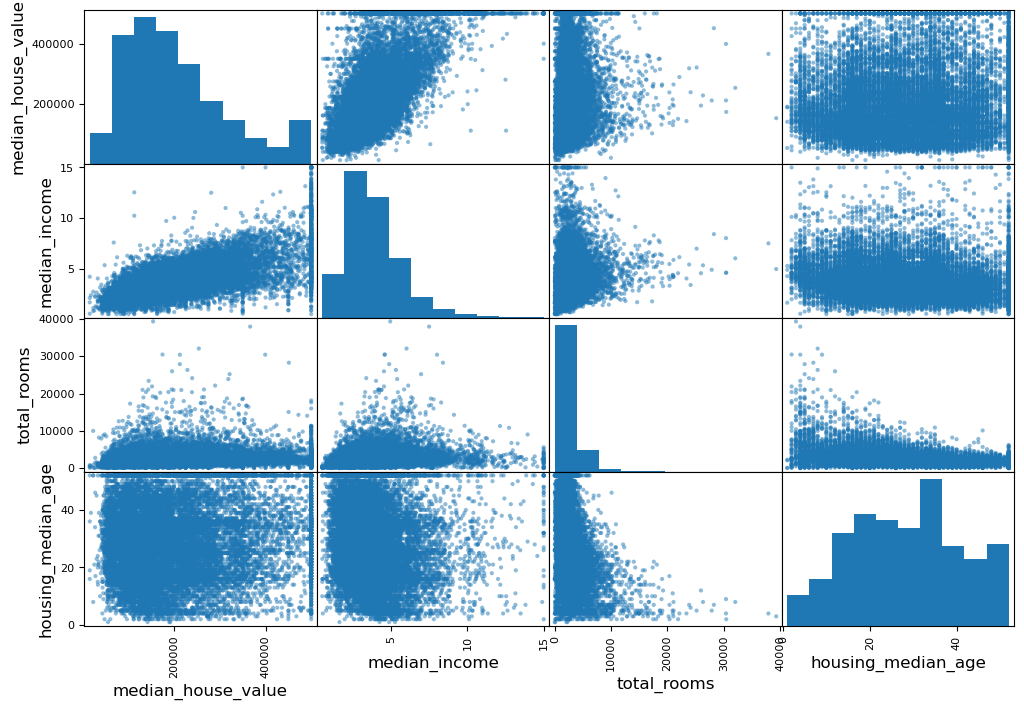

In [69]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value',
              'median_income',
              'total_rooms', 
              'housing_median_age']

scatter_matrix(housing[attributes],
               figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

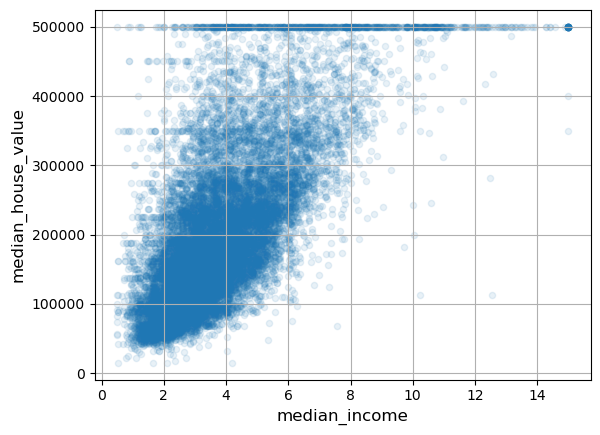

In [70]:
housing.plot(kind='scatter',
             x='median_income',
             y='median_house_value',
             alpha=.1,
             grid=True)

In [71]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

housing[['rooms_per_house', 'bedrooms_ratio', 'people_per_house']].head()

,rooms_per_house,bedrooms_ratio,people_per_house
13096,3.211799,0.335742,1.524178
14973,5.504202,0.180153,1.865546
3785,5.334975,0.200369,2.768473
14689,5.351282,0.203881,2.365385
20507,3.725256,0.277371,1.631399


In [72]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_index(ascending=False)

total_rooms           0.137455
total_bedrooms        0.054635
rooms_per_house       0.143663
population           -0.020153
people_per_house     -0.038224
median_income         0.688380
median_house_value    1.000000
longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
households            0.071426
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

## Select and Train a Model

## Fine-Tune Your Model

## Exercises